## Import and structure data

In [ ]:
!pip install torchaudio

In [1]:
# Import libraries
import pandas as pd
import torchaudio
import torch
import os

c:\Users\hajko\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [16]:
os.getcwd()

'c:\\Users\\hajko\\Desktop\\Methods\\DL-Project\\model B'

In [2]:
# Import train data
df_train = pd.DataFrame(columns=["file_name", "accent", "gender", "audio"])
df_train.file_name = os.listdir("../data/Train")
df_train.accent = [file_name[0] for file_name in df_train.file_name]
df_train.gender = [file_name[1] for file_name in df_train.file_name]
loaded_audio = []
# display(df_train)
sample_rates = set()
for file_name in df_train.file_name:
    tensor, sr = torchaudio.load(f"../data/Train/{file_name}")
    loaded_audio.append(tensor)
    sample_rates.add(sr)

df_train.audio = loaded_audio
print(f"Sample rates in dataset: {sample_rates}")

Sample rates in dataset: {16000}


In [3]:
display(df_train)

,file_name,accent,gender,audio
0,1f_1018.wav,1,f,"[[tensor(-0.0002), tensor(-6.1035e-05), tensor..."
1,1f_1026.wav,1,f,"[[tensor(-0.0008), tensor(-0.0008), tensor(-0...."
2,1f_1031.wav,1,f,"[[tensor(-0.0002), tensor(-0.0002), tensor(-0...."
3,1f_1070.wav,1,f,"[[tensor(0.0022), tensor(0.0019), tensor(0.001..."
4,1f_1075.wav,1,f,"[[tensor(0.), tensor(3.0518e-05), tensor(0.), ..."
...,...,...,...,...
3161,5m_9719.wav,5,m,"[[tensor(0.0002), tensor(3.0518e-05), tensor(0..."
3162,5m_9742.wav,5,m,"[[tensor(0.0003), tensor(0.0002), tensor(0.000..."
3163,5m_9771.wav,5,m,"[[tensor(0.0003), tensor(0.0002), tensor(0.000..."
3164,5m_9778.wav,5,m,"[[tensor(0.), tensor(0.), tensor(0.), tensor(0..."


In [4]:
df_train["length"] = [len(df_train.audio[i][0])/16000 for i  in range(0, len(df_train))]
df_train.head()
#print(len(df_train.audio[0][0])/16000)

,file_name,accent,gender,audio,length
0,1f_1018.wav,1,f,"[[tensor(-0.0002), tensor(-6.1035e-05), tensor...",3.413312
1,1f_1026.wav,1,f,"[[tensor(-0.0008), tensor(-0.0008), tensor(-0....",5.632000
2,1f_1031.wav,1,f,"[[tensor(-0.0002), tensor(-0.0002), tensor(-0....",4.693313
3,1f_1070.wav,1,f,"[[tensor(0.0022), tensor(0.0019), tensor(0.001...",3.925312
4,1f_1075.wav,1,f,"[[tensor(0.), tensor(3.0518e-05), tensor(0.), ...",2.737500


In [5]:
#length per gender and accent

female_subset = df_train[df_train.gender == "f"]
male_subset = df_train[df_train.gender == "m"]

accent1 = df_train[df_train.accent == "1"]
accent2 = df_train[df_train.accent == "2"]
accent3 = df_train[df_train.accent == "3"]
accent4 = df_train[df_train.accent == "4"]
accent5 = df_train[df_train.accent == "5"]




In [6]:
accent1.head()

,file_name,accent,gender,audio,length
0,1f_1018.wav,1,f,"[[tensor(-0.0002), tensor(-6.1035e-05), tensor...",3.413312
1,1f_1026.wav,1,f,"[[tensor(-0.0008), tensor(-0.0008), tensor(-0....",5.632000
2,1f_1031.wav,1,f,"[[tensor(-0.0002), tensor(-0.0002), tensor(-0....",4.693313
3,1f_1070.wav,1,f,"[[tensor(0.0022), tensor(0.0019), tensor(0.001...",3.925312
4,1f_1075.wav,1,f,"[[tensor(0.), tensor(3.0518e-05), tensor(0.), ...",2.737500


In [7]:
print(female_subset.length.sum())
print(male_subset.length.sum())


print(accent1.length.sum())
print(accent2.length.sum())
print(accent3.length.sum())
print(accent4.length.sum())
print(accent5.length.sum())

8724.842812500001
7937.5096875
3593.72775
3293.5224375
3041.6415625
4396.6675
2336.79325


In [8]:
# Display audio from DataFrame to make sure it loaded properly
import IPython.display as ipd
ipd.Audio(df_train.audio[0], rate=16000)

## Data analysis

In [9]:
#number of males and females in the data set
gender_distribution = [female_subset.length.sum(), male_subset.length.sum()]

In [10]:
# number of entried for each accents in the datset
accent_distribution = [accent1.length.sum(), accent2.length.sum(), accent3.length.sum(), accent4.length.sum(), accent5.length.sum()]


Text(0, 0.5, 'Total audio length')

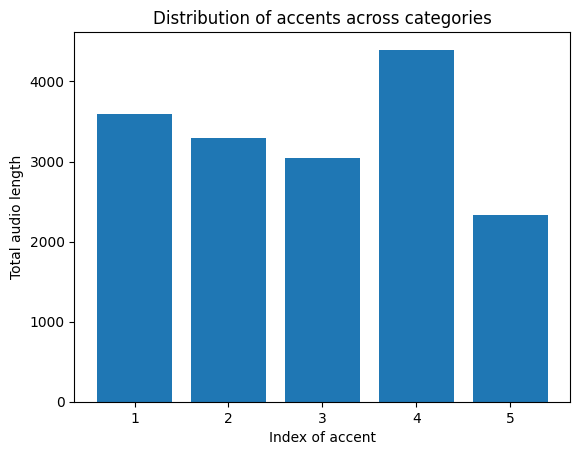

In [11]:
import matplotlib.pyplot as plt

plt.bar([1,2,3,4,5], accent_distribution)
plt.title("Distribution of accents across categories")
plt.xlabel("Index of accent")
plt.ylabel("Total audio length")

Text(0, 0.5, 'Total audio length')

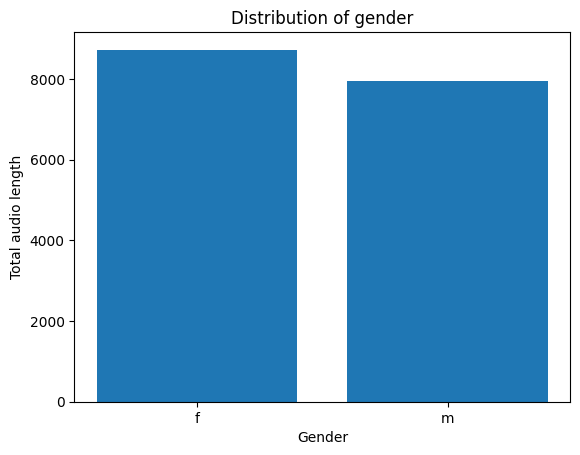

In [12]:
import matplotlib.pyplot as plt

plt.bar(["f", "m"], gender_distribution)
plt.title("Distribution of gender")
plt.xlabel("Gender")
plt.ylabel("Total audio length")

In [13]:
#min max of audio

df_train["length"].describe()

count    3166.000000
mean        5.262904
std         1.739950
min         1.671375
25%         4.012500
50%         5.042312
75%         6.314625
max        12.970625
Name: length, dtype: float64

73727


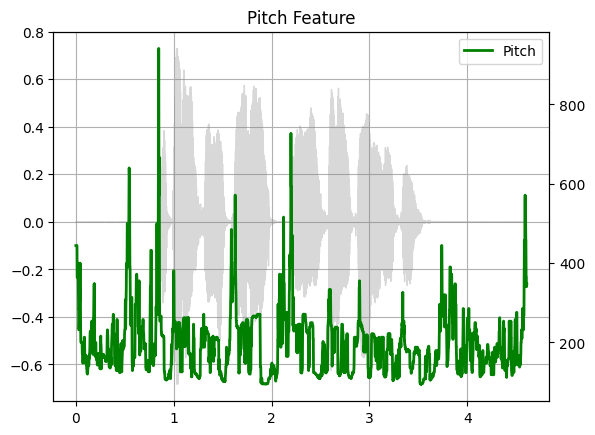

In [14]:
#pitch detection

person = 5 
print(len(df_train.audio[person][0]))
pitch = torchaudio.functional.detect_pitch_frequency(
  df_train.audio[person][0],
  16000,
  frame_time = 0.001,
  win_length = 30,
  freq_low = 85,
  freq_high = 3400
)



def plot_pitch(waveform, sr, pitch):
    figure, axis = plt.subplots(1, 1)
    axis.set_title("Pitch Feature")
    axis.grid(True)

    end_time = waveform.shape[0] / sr
    time_axis = torch.linspace(0, end_time, waveform.shape[0])
    axis.plot(time_axis, waveform, linewidth=1, color="gray", alpha=0.3)

    axis2 = axis.twinx()
    time_axis = torch.linspace(0, end_time, pitch.shape[0])
    axis2.plot(time_axis, pitch, linewidth=2, label="Pitch", color="green")

    axis2.legend(loc=0)


plot_pitch(df_train.audio[person][0], 16000, pitch)
